### **Initial Setup**

In [3]:
!apt-get update && apt-get install alien
!apt-get -qq install xxd
!pip install pandas numpy matplotlib
# %tensorflow_version 2.x
!pip install tensorflow
!pip install -q tensorflow-model-optimization

/bin/sh: apt-get: command not found
/bin/sh: apt-get: command not found


### **Import Libraries**

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow_model_optimization.sparsity import keras as sparsity

### **Visualisation of Gestures Sample Data**

### **Squat**

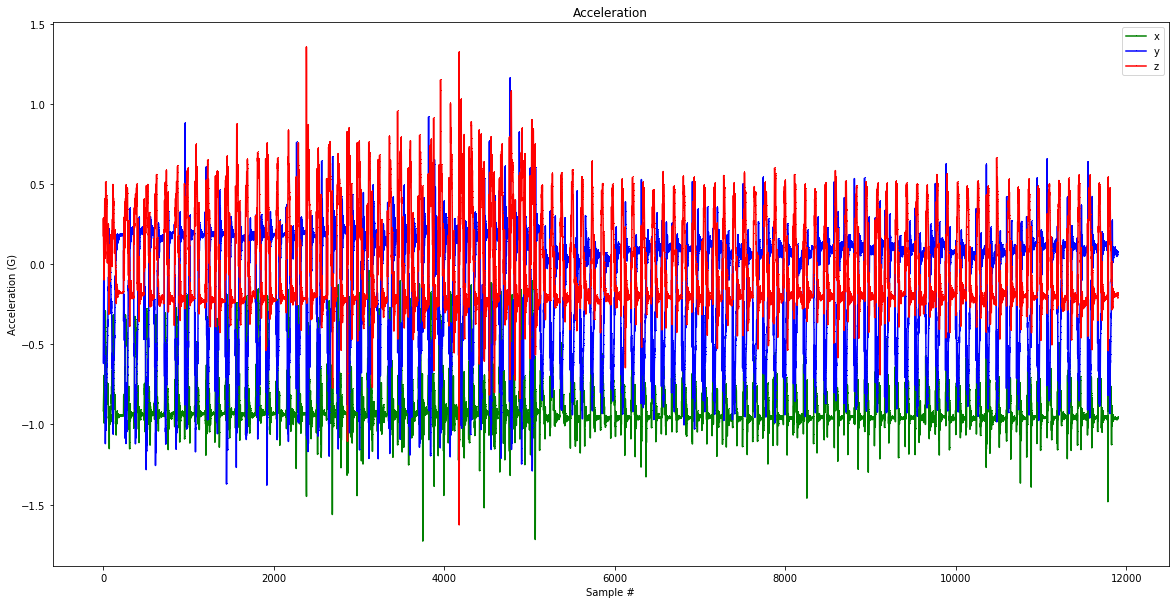

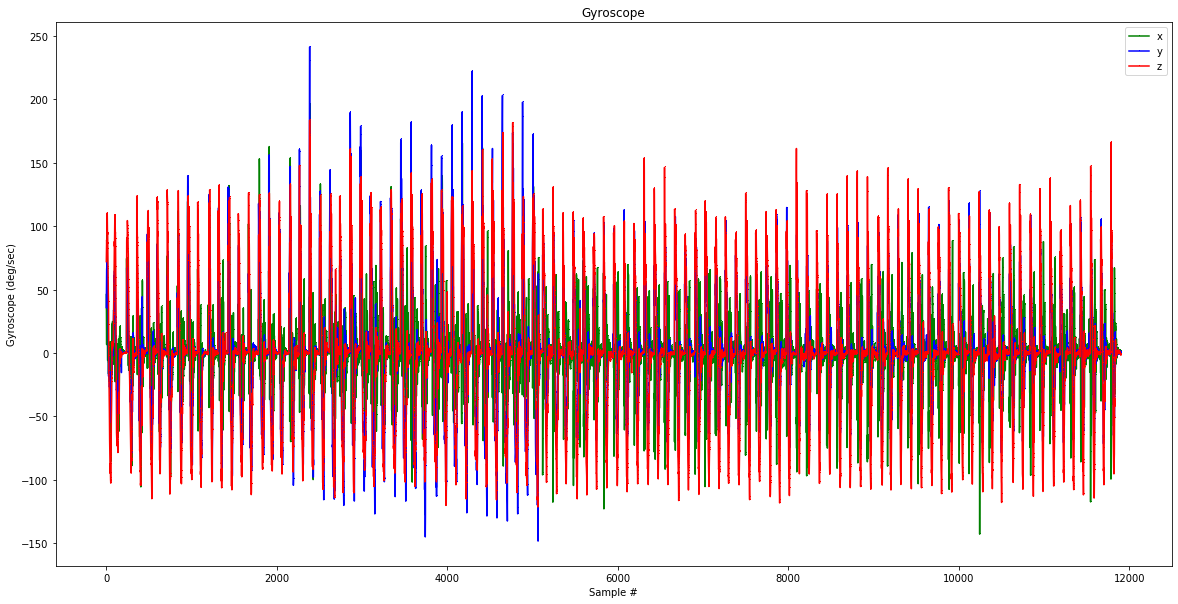

In [19]:
filename = "squat_set.csv"

df = pd.read_csv("../data/" + filename)
index = range(1, len(df['aX']) + 1)

plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()

### **Jump**

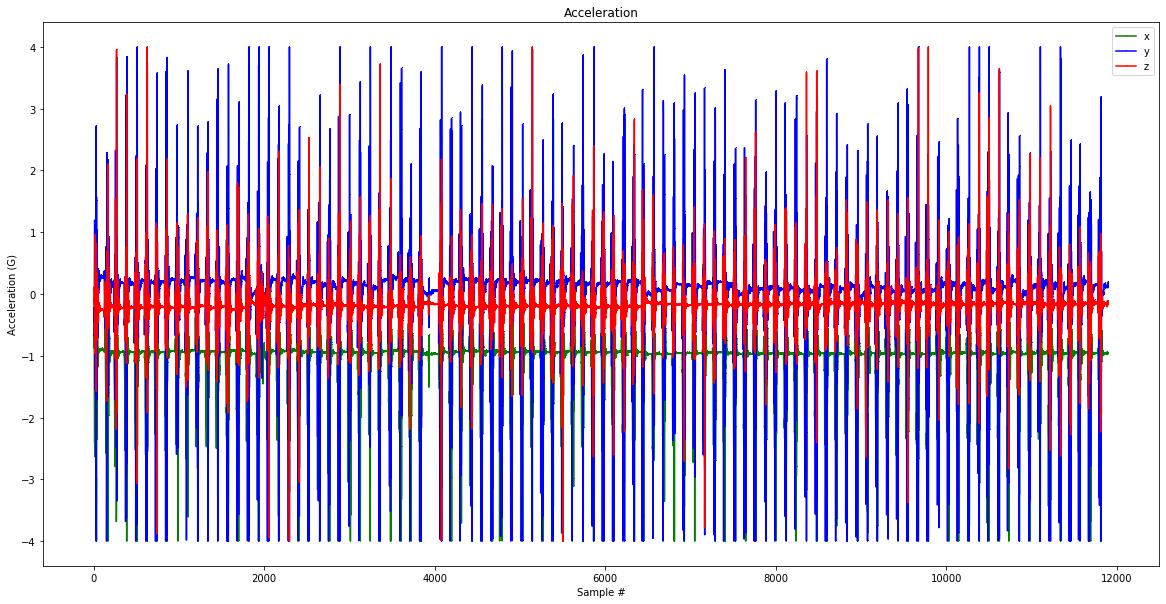

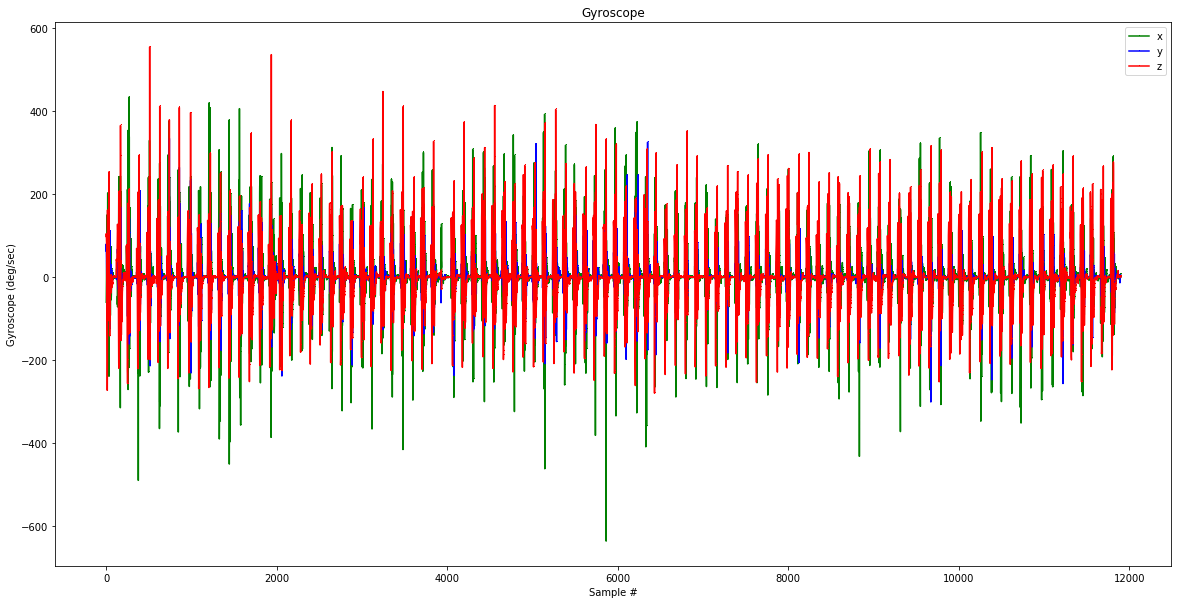

In [20]:
filename = "jump_set.csv"

df = pd.read_csv("../data/" + filename)
index = range(1, len(df['aX']) + 1)

plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()

### **Walk**

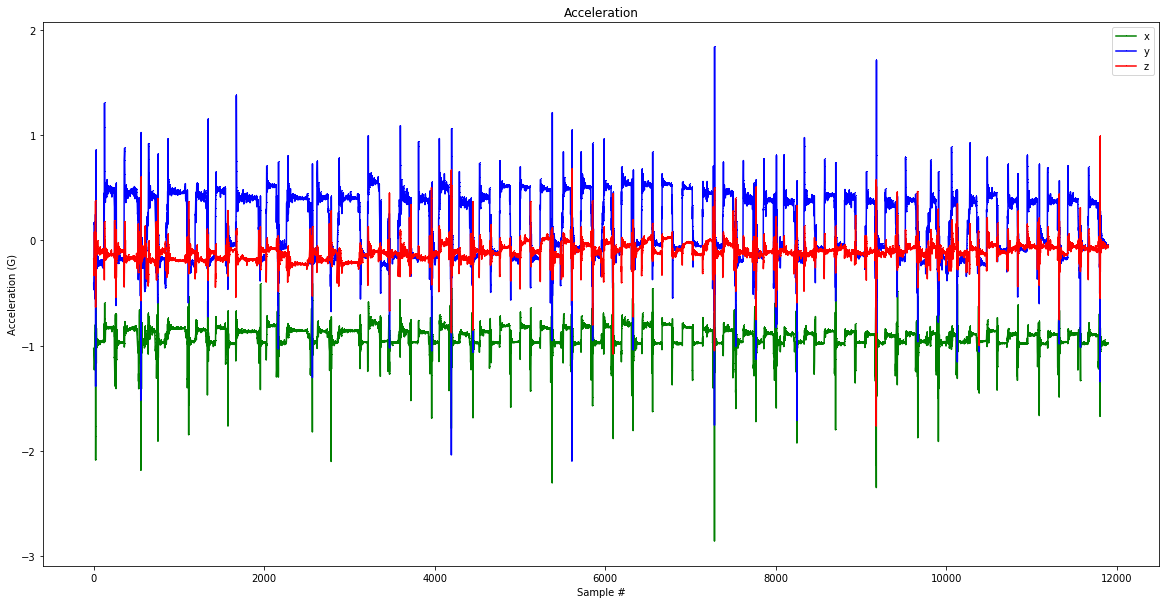

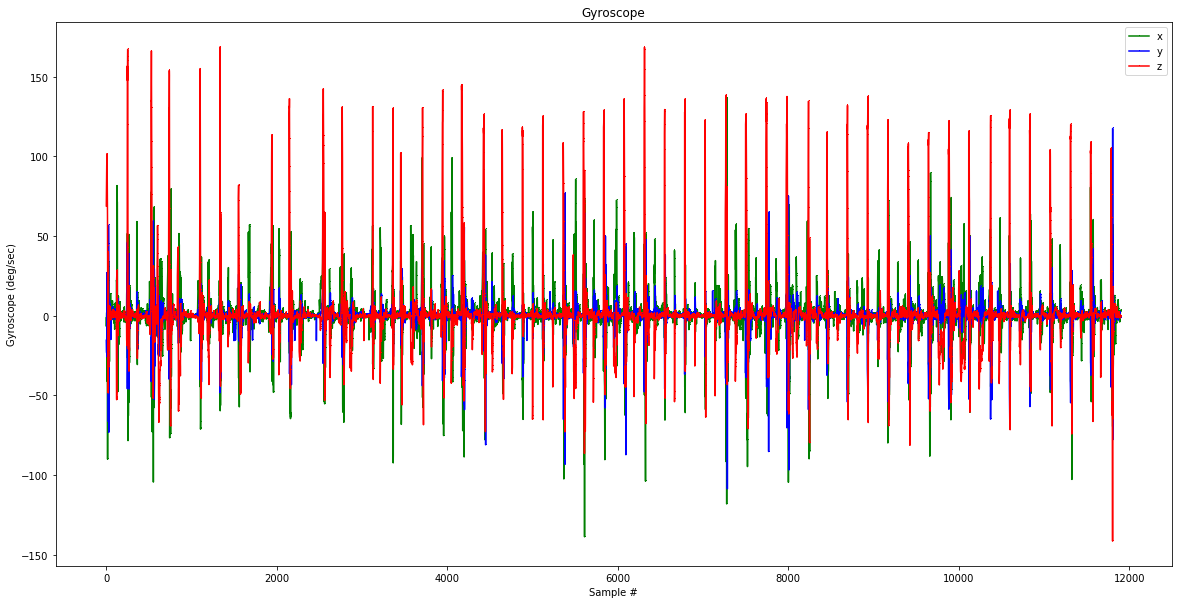

In [21]:
filename = "walk_set.csv"

df = pd.read_csv("../data/" + filename)
index = range(1, len(df['aX']) + 1)

plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()

### **Run**

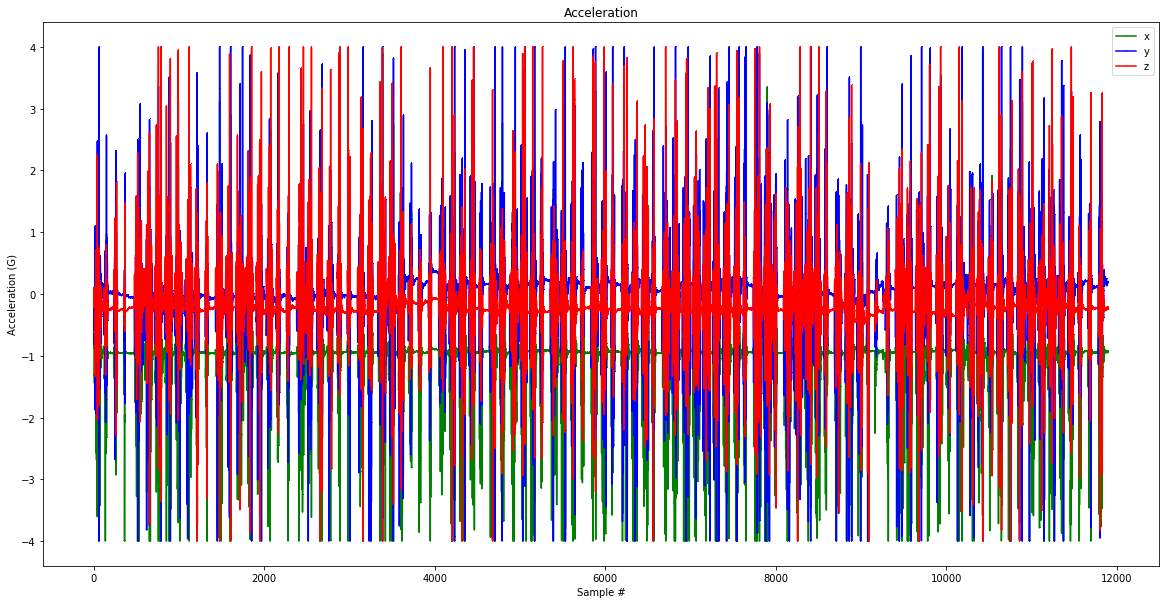

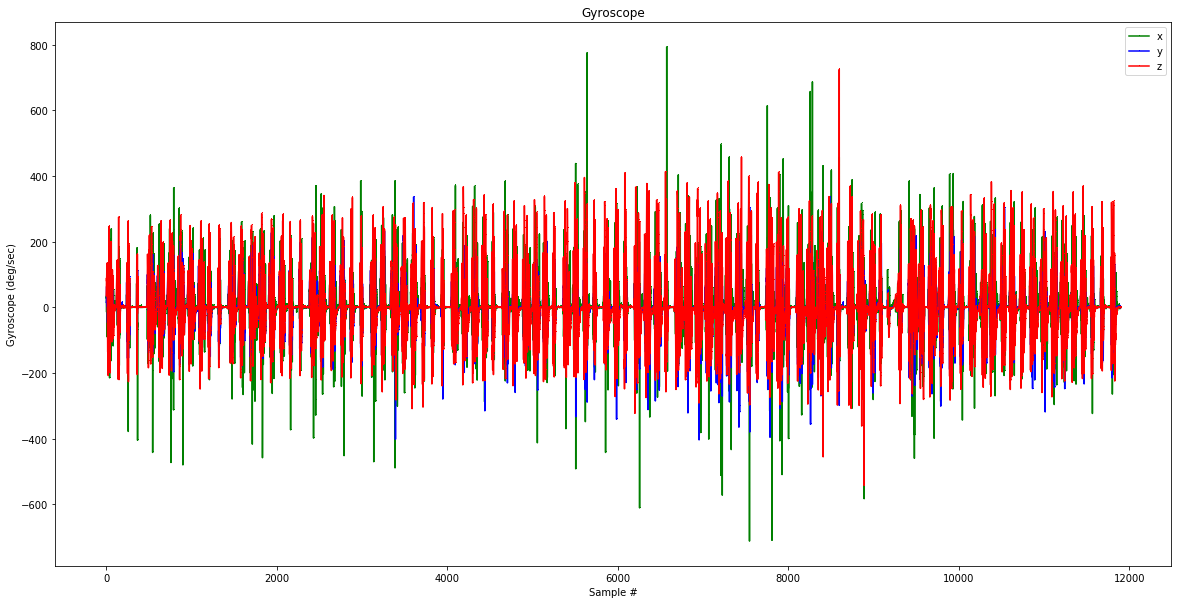

In [22]:
filename = "run_set.csv"

df = pd.read_csv("../data/" + filename)
index = range(1, len(df['aX']) + 1)

plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()

### **Other**

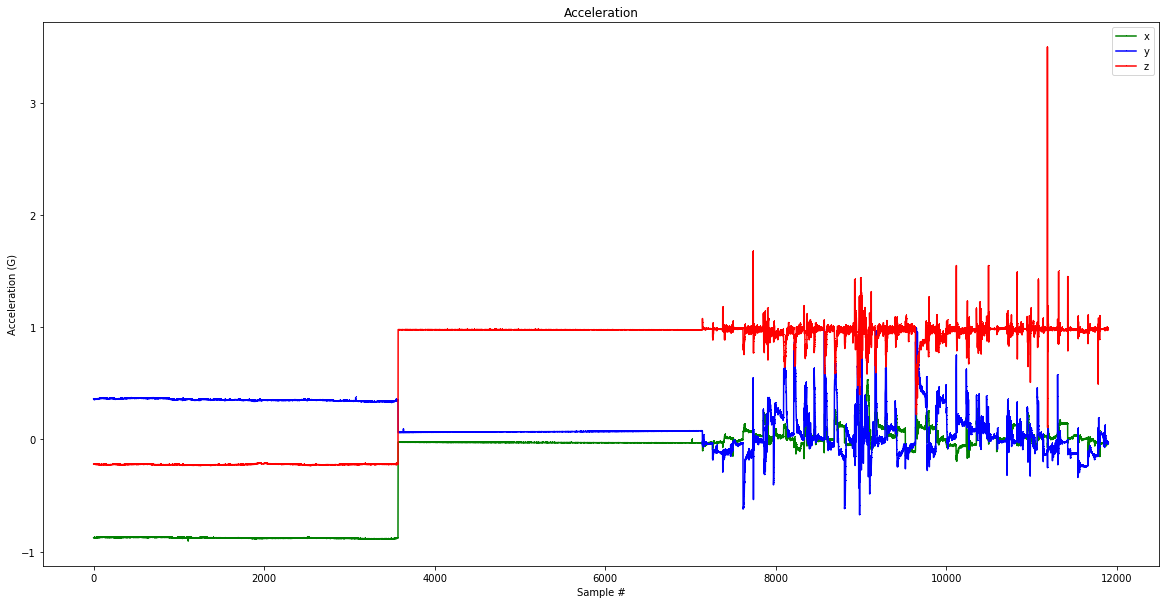

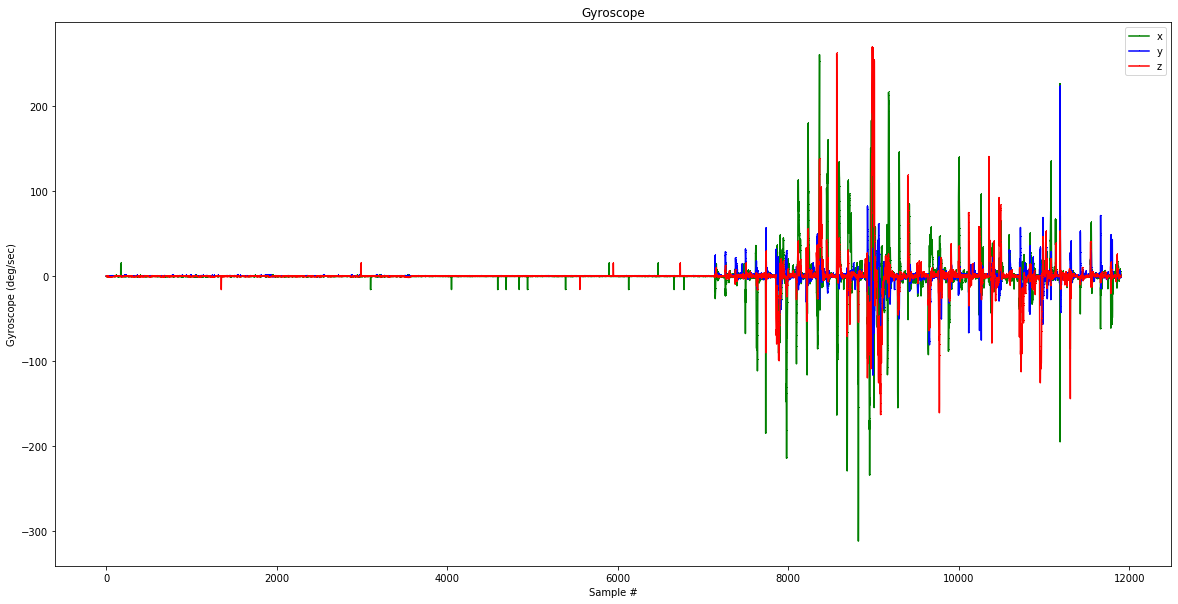

In [23]:
filename = "other_set.csv"

df = pd.read_csv("../data/" + filename)
index = range(1, len(df['aX']) + 1)

plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()

### **Data set parsing and preparation**

In [24]:
print(f"TensorFlow version = {tf.__version__}\n")

# Set a fixed random seed value, for reproducibility, this will allow us to get
# the same random numbers each time the notebook is run
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# the list of gestures that data is available for
GESTURES = [
    "squat_set",
    "jump_set",
    "walk_set",
    "run_set",
    "other_set"]

SAMPLES_PER_GESTURE = 119

NUM_GESTURES = len(GESTURES)

# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)

inputs = []
outputs = []

# read each csv file and push an input and output
for gesture_index in range(NUM_GESTURES):
  gesture = GESTURES[gesture_index]
  print(f"Processing index {gesture_index} for gesture '{gesture}'.")
  
  output = ONE_HOT_ENCODED_GESTURES[gesture_index]
  print(output)
  df = pd.read_csv("../data/" + gesture + ".csv")
  
  # calculate the number of gesture recordings in the file
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)
  
  print(f"\tThere are {num_recordings} recordings of the {gesture} gesture.")
  
  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j
      # normalize the input data, between 0 to 1:
      # - acceleration is between: -4 to +4
      # - gyroscope is between: -2000 to +2000
      tensor += [
          (df['aX'][index] + 4) / 8,
          (df['aY'][index] + 4) / 8,
          (df['aZ'][index] + 4) / 8,
          (df['gX'][index] + 2000) / 4000,
          (df['gY'][index] + 2000) / 4000,
          (df['gZ'][index] + 2000) / 4000
      ]

    inputs.append(tensor)
    outputs.append(output)
# convert the list to numpy array
inputs = np.array(inputs)
outputs = np.array(outputs)

print("Data set parsing and preparation complete.")

TensorFlow version = 2.3.1

Processing index 0 for gesture 'squat_set'.
[1. 0. 0. 0. 0.]
	There are 100 recordings of the squat_set gesture.
Processing index 1 for gesture 'jump_set'.
[0. 1. 0. 0. 0.]
	There are 100 recordings of the jump_set gesture.
Processing index 2 for gesture 'walk_set'.
[0. 0. 1. 0. 0.]
	There are 100 recordings of the walk_set gesture.
Processing index 3 for gesture 'run_set'.
[0. 0. 0. 1. 0.]
	There are 100 recordings of the run_set gesture.
Processing index 4 for gesture 'other_set'.
[0. 0. 0. 0. 1.]
	There are 100 recordings of the other_set gesture.
Data set parsing and preparation complete.


### **Splitting the data into training, testing and validation**


In [11]:
# Randomize the order of the inputs, so they can be evenly distributed for training, testing, and validation
# https://stackoverflow.com/a/37710486/2020087
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)
# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")

Data set randomization and splitting complete.


### **Build and train the model**

In [12]:
# build the model and train it
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dropout(.15))
model.add(tf.keras.layers.Dense(75, activation='relu'))
model.add(tf.keras.layers.Dropout(.15))
model.add(tf.keras.layers.Dense(75, activation='relu'))
model.add(tf.keras.layers.Dropout(.15))
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) # softmax is used, because we only expect one gesture to occur per input
adam = tf.keras.optimizers.Adam(
       learning_rate=0.0001,
       name="adam")
model.compile(optimizer=adam, loss='mse', metrics=['accuracy'])
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',min_lr=0.0001)
history = model.fit(inputs_train, outputs_train, epochs=700, batch_size=10, callbacks=[reduce_lr], validation_data=(inputs_validate, outputs_validate))

Epoch 1/700
30/30 [==============================] - 0s 8ms/step - loss: 0.1618 - accuracy: 0.2000 - val_loss: 0.1571 - val_accuracy: 0.2400
Epoch 2/700
30/30 [==============================] - 0s 4ms/step - loss: 0.1607 - accuracy: 0.2300 - val_loss: 0.1572 - val_accuracy: 0.3600
Epoch 3/700
30/30 [==============================] - 0s 3ms/step - loss: 0.1625 - accuracy: 0.2033 - val_loss: 0.1573 - val_accuracy: 0.3900
Epoch 4/700
30/30 [==============================] - 0s 3ms/step - loss: 0.1605 - accuracy: 0.2367 - val_loss: 0.1569 - val_accuracy: 0.3000
Epoch 5/700
30/30 [==============================] - 0s 2ms/step - loss: 0.1603 - accuracy: 0.2300 - val_loss: 0.1582 - val_accuracy: 0.4200
Epoch 6/700
30/30 [==============================] - 0s 3ms/step - loss: 0.1589 - accuracy: 0.2433 - val_loss: 0.1575 - val_accuracy: 0.4800
Epoch 7/700
30/30 [==============================] - 0s 3ms/step - loss: 0.1597 - accuracy: 0.2367 - val_loss: 0.1573 - val_accuracy: 0.4200
Epoch 8/700
3

Epoch 59/700
30/30 [==============================] - 0s 2ms/step - loss: 0.1140 - accuracy: 0.5800 - val_loss: 0.0894 - val_accuracy: 0.7400
Epoch 60/700
30/30 [==============================] - 0s 3ms/step - loss: 0.1107 - accuracy: 0.5967 - val_loss: 0.0887 - val_accuracy: 0.7900
Epoch 61/700
30/30 [==============================] - 0s 3ms/step - loss: 0.1089 - accuracy: 0.6267 - val_loss: 0.0845 - val_accuracy: 0.7300
Epoch 62/700
30/30 [==============================] - 0s 3ms/step - loss: 0.1095 - accuracy: 0.6200 - val_loss: 0.0849 - val_accuracy: 0.8000
Epoch 63/700
30/30 [==============================] - 0s 4ms/step - loss: 0.1064 - accuracy: 0.6167 - val_loss: 0.0847 - val_accuracy: 0.7300
Epoch 64/700
30/30 [==============================] - 0s 3ms/step - loss: 0.1048 - accuracy: 0.6533 - val_loss: 0.0807 - val_accuracy: 0.7500
Epoch 65/700
30/30 [==============================] - 0s 3ms/step - loss: 0.1008 - accuracy: 0.6433 - val_loss: 0.0809 - val_accuracy: 0.7300
Epoch 

30/30 [==============================] - 0s 2ms/step - loss: 0.0586 - accuracy: 0.8033 - val_loss: 0.0450 - val_accuracy: 0.8700
Epoch 117/700
30/30 [==============================] - 0s 2ms/step - loss: 0.0558 - accuracy: 0.8200 - val_loss: 0.0543 - val_accuracy: 0.8400
Epoch 118/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.8000 - val_loss: 0.0426 - val_accuracy: 0.8600
Epoch 119/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0589 - accuracy: 0.8067 - val_loss: 0.0425 - val_accuracy: 0.8700
Epoch 120/700
30/30 [==============================] - 0s 2ms/step - loss: 0.0540 - accuracy: 0.8367 - val_loss: 0.0440 - val_accuracy: 0.8700
Epoch 121/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 0.8033 - val_loss: 0.0394 - val_accuracy: 0.8600
Epoch 122/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.8167 - val_loss: 0.0397 - val_accuracy: 0.8600
Epoch 123/700

30/30 [==============================] - 0s 2ms/step - loss: 0.0398 - accuracy: 0.8633 - val_loss: 0.0352 - val_accuracy: 0.8800
Epoch 174/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0450 - accuracy: 0.8467 - val_loss: 0.0524 - val_accuracy: 0.8300
Epoch 175/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0429 - accuracy: 0.8567 - val_loss: 0.0355 - val_accuracy: 0.8800
Epoch 176/700
30/30 [==============================] - 0s 2ms/step - loss: 0.0447 - accuracy: 0.8400 - val_loss: 0.0368 - val_accuracy: 0.8800
Epoch 177/700
30/30 [==============================] - 0s 4ms/step - loss: 0.0396 - accuracy: 0.8800 - val_loss: 0.0429 - val_accuracy: 0.8400
Epoch 178/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.8867 - val_loss: 0.0387 - val_accuracy: 0.8800
Epoch 179/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.8667 - val_loss: 0.0332 - val_accuracy: 0.8900
Epoch 180/700

30/30 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.8633 - val_loss: 0.0378 - val_accuracy: 0.8800
Epoch 231/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.8700 - val_loss: 0.0345 - val_accuracy: 0.8700
Epoch 232/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 0.8800 - val_loss: 0.0405 - val_accuracy: 0.8700
Epoch 233/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.8733 - val_loss: 0.0369 - val_accuracy: 0.8700
Epoch 234/700
30/30 [==============================] - 0s 5ms/step - loss: 0.0319 - accuracy: 0.8933 - val_loss: 0.0317 - val_accuracy: 0.8900
Epoch 235/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.8800 - val_loss: 0.0411 - val_accuracy: 0.8700
Epoch 236/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.8967 - val_loss: 0.0306 - val_accuracy: 0.8800
Epoch 237/700

30/30 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.8867 - val_loss: 0.0284 - val_accuracy: 0.9200
Epoch 288/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.8933 - val_loss: 0.0300 - val_accuracy: 0.9000
Epoch 289/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.9000 - val_loss: 0.0265 - val_accuracy: 0.9100
Epoch 290/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.9067 - val_loss: 0.0343 - val_accuracy: 0.8700
Epoch 291/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9000 - val_loss: 0.0330 - val_accuracy: 0.8900
Epoch 292/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.8900 - val_loss: 0.0328 - val_accuracy: 0.8900
Epoch 293/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.8867 - val_loss: 0.0277 - val_accuracy: 0.9100
Epoch 294/700

30/30 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.8933 - val_loss: 0.0267 - val_accuracy: 0.9200
Epoch 345/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.8967 - val_loss: 0.0316 - val_accuracy: 0.9000
Epoch 346/700
30/30 [==============================] - 0s 6ms/step - loss: 0.0267 - accuracy: 0.9000 - val_loss: 0.0373 - val_accuracy: 0.8800
Epoch 347/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9100 - val_loss: 0.0253 - val_accuracy: 0.9200
Epoch 348/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.8767 - val_loss: 0.0357 - val_accuracy: 0.8800
Epoch 349/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9000 - val_loss: 0.0272 - val_accuracy: 0.9100
Epoch 350/700
30/30 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9000 - val_loss: 0.0256 - val_accuracy: 0.9200
Epoch 351/700

30/30 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.8967 - val_loss: 0.0284 - val_accuracy: 0.9100
Epoch 402/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.8767 - val_loss: 0.0283 - val_accuracy: 0.9100
Epoch 403/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9100 - val_loss: 0.0306 - val_accuracy: 0.8900
Epoch 404/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.8967 - val_loss: 0.0306 - val_accuracy: 0.8600
Epoch 405/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9033 - val_loss: 0.0357 - val_accuracy: 0.9000
Epoch 406/700
30/30 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 0.9333 - val_loss: 0.0286 - val_accuracy: 0.9100
Epoch 407/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 0.9200 - val_loss: 0.0239 - val_accuracy: 0.9200
Epoch 408/700

30/30 [==============================] - 0s 4ms/step - loss: 0.0243 - accuracy: 0.9200 - val_loss: 0.0304 - val_accuracy: 0.9100
Epoch 459/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 0.9200 - val_loss: 0.0282 - val_accuracy: 0.8900
Epoch 460/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0228 - accuracy: 0.9200 - val_loss: 0.0427 - val_accuracy: 0.8700
Epoch 461/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9100 - val_loss: 0.0286 - val_accuracy: 0.9100
Epoch 462/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9300 - val_loss: 0.0233 - val_accuracy: 0.9100
Epoch 463/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9133 - val_loss: 0.0395 - val_accuracy: 0.8300
Epoch 464/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9100 - val_loss: 0.0308 - val_accuracy: 0.8900
Epoch 465/700

30/30 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9167 - val_loss: 0.0403 - val_accuracy: 0.8400
Epoch 516/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9300 - val_loss: 0.0337 - val_accuracy: 0.8700
Epoch 517/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9067 - val_loss: 0.0498 - val_accuracy: 0.8000
Epoch 518/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9000 - val_loss: 0.0352 - val_accuracy: 0.8700
Epoch 519/700
30/30 [==============================] - 0s 2ms/step - loss: 0.0215 - accuracy: 0.9267 - val_loss: 0.0310 - val_accuracy: 0.9000
Epoch 520/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9067 - val_loss: 0.0394 - val_accuracy: 0.8600
Epoch 521/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0226 - accuracy: 0.9367 - val_loss: 0.0365 - val_accuracy: 0.8900
Epoch 522/700

30/30 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9300 - val_loss: 0.0265 - val_accuracy: 0.9200
Epoch 573/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9267 - val_loss: 0.0297 - val_accuracy: 0.9000
Epoch 574/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9033 - val_loss: 0.0384 - val_accuracy: 0.8300
Epoch 575/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9300 - val_loss: 0.0293 - val_accuracy: 0.8600
Epoch 576/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.9267 - val_loss: 0.0432 - val_accuracy: 0.8500
Epoch 577/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0204 - accuracy: 0.9233 - val_loss: 0.0228 - val_accuracy: 0.9200
Epoch 578/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0174 - accuracy: 0.9367 - val_loss: 0.0395 - val_accuracy: 0.8400
Epoch 579/700

30/30 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.9200 - val_loss: 0.0309 - val_accuracy: 0.9000
Epoch 630/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9400 - val_loss: 0.0208 - val_accuracy: 0.9300
Epoch 631/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.9433 - val_loss: 0.0207 - val_accuracy: 0.9200
Epoch 632/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9367 - val_loss: 0.0388 - val_accuracy: 0.8400
Epoch 633/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9167 - val_loss: 0.0298 - val_accuracy: 0.8600
Epoch 634/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0179 - accuracy: 0.9433 - val_loss: 0.0270 - val_accuracy: 0.9100
Epoch 635/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.9400 - val_loss: 0.0448 - val_accuracy: 0.8400
Epoch 636/700

30/30 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9300 - val_loss: 0.0275 - val_accuracy: 0.9000
Epoch 687/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9500 - val_loss: 0.0293 - val_accuracy: 0.9000
Epoch 688/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0161 - accuracy: 0.9567 - val_loss: 0.0298 - val_accuracy: 0.9000
Epoch 689/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9300 - val_loss: 0.0332 - val_accuracy: 0.8900
Epoch 690/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.9467 - val_loss: 0.0384 - val_accuracy: 0.8700
Epoch 691/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9133 - val_loss: 0.0418 - val_accuracy: 0.8500
Epoch 692/700
30/30 [==============================] - 0s 3ms/step - loss: 0.0198 - accuracy: 0.9267 - val_loss: 0.0404 - val_accuracy: 0.8900
Epoch 693/700

### **Visualization of Training and Validation loss**

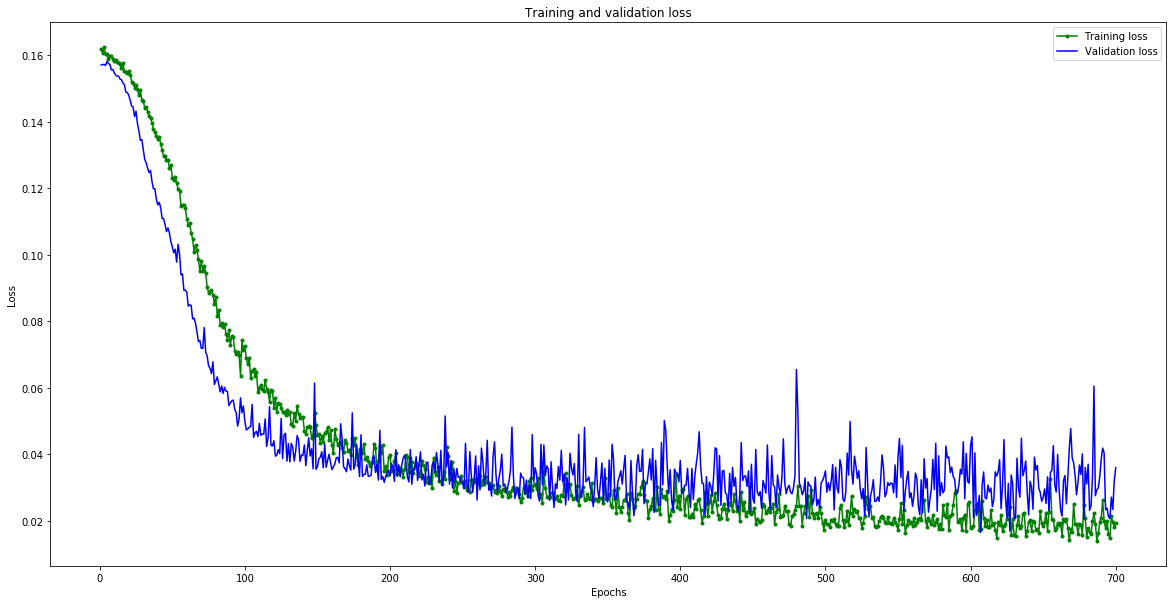

[20.0, 10.0]


In [13]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (20,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', linestyle='solid', label='Training loss')
plt.plot(epochs, val_loss, 'b', linestyle='solid', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

### **Visualization of Training and Validation Accuracy**

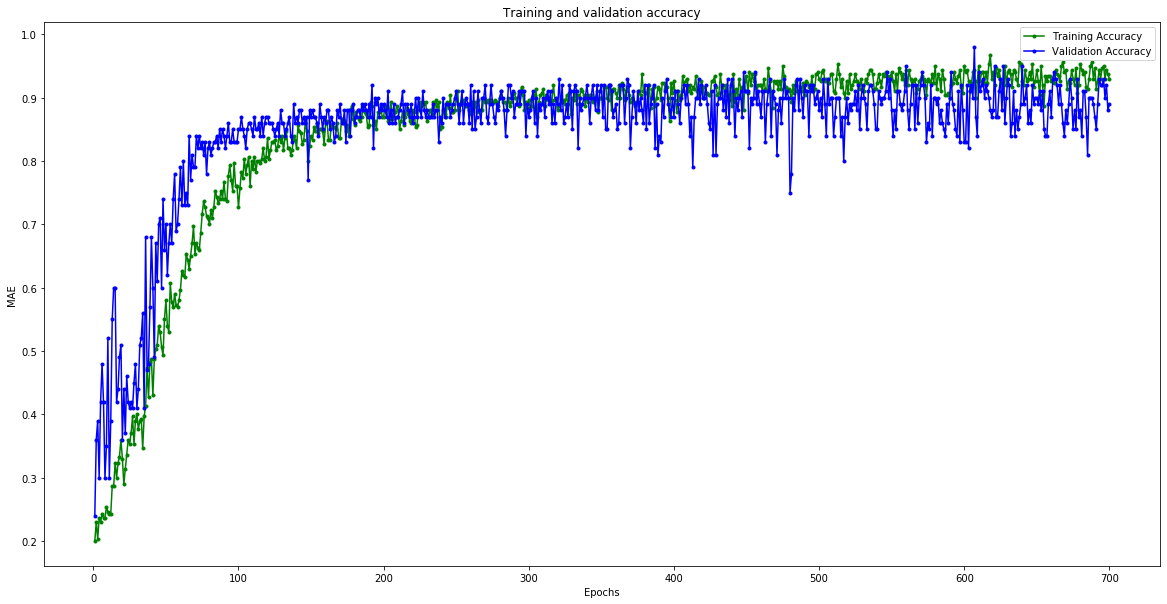

In [14]:

# graph of mean absolute error
mae = history.history['accuracy']
val_mae = history.history['val_accuracy']
plt.plot(epochs, mae, 'g.', linestyle='solid', label='Training Accuracy')
plt.plot(epochs, val_mae, 'b.', linestyle='solid', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

### **Model Predictions**

In [15]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

predictions =
 [[0.    0.    0.    0.    1.   ]
 [0.    0.    0.    0.    1.   ]
 [0.996 0.    0.002 0.001 0.   ]
 [0.001 0.    0.004 0.995 0.   ]
 [0.998 0.    0.001 0.    0.001]
 [0.004 0.    0.936 0.003 0.057]
 [0.002 0.009 0.434 0.004 0.551]
 [0.    0.988 0.001 0.001 0.01 ]
 [0.25  0.    0.704 0.017 0.029]
 [0.999 0.    0.001 0.    0.   ]
 [0.    0.941 0.006 0.008 0.044]
 [0.996 0.    0.002 0.    0.001]
 [0.002 0.003 0.548 0.002 0.444]
 [0.001 0.002 0.625 0.002 0.369]
 [0.005 0.001 0.858 0.007 0.129]
 [0.005 0.001 0.899 0.004 0.091]
 [0.    0.999 0.    0.001 0.001]
 [0.001 0.    0.865 0.001 0.133]
 [0.    0.999 0.    0.001 0.   ]
 [0.009 0.003 0.791 0.006 0.191]
 [0.001 0.    0.937 0.001 0.06 ]
 [0.    0.997 0.    0.001 0.002]
 [0.998 0.    0.001 0.    0.   ]
 [0.002 0.003 0.592 0.003 0.4  ]
 [0.002 0.05  0.344 0.151 0.453]
 [0.    0.    0.    0.    1.   ]
 [0.997 0.    0.002 0.    0.   ]
 [0.    0.995 0.001 0.001 0.003]
 [0.002 0.008 0.444 0.004 0.542]
 [0.006 0.224 0.194 0.365 0.

### **Confusion Matrix**

In [16]:
tf.math.confusion_matrix(labels=tf.argmax(outputs_test, 1), predictions=tf.argmax(predictions, 1))


<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[20,  0,  0,  0,  0],
       [ 0, 16,  3,  0,  1],
       [ 0,  0, 28,  0,  0],
       [ 0,  0,  0, 12,  1],
       [ 0,  0,  0,  0, 19]], dtype=int32)>

### **Conversion of model to tensorflow lite model**

In [36]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("models/gesture_model.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("models/gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)

INFO:tensorflow:Assets written to: /var/folders/fv/lj40ypl138q2v8_04cxs75c80000gn/T/tmpzlxdbx9g/assets


INFO:tensorflow:Assets written to: /var/folders/fv/lj40ypl138q2v8_04cxs75c80000gn/T/tmpzlxdbx9g/assets


Model is 342556 bytes


### **Creating Model Header File**

In [35]:
!echo "const unsigned char model[] = {" > models/model.h
!cat models/gesture_model.tflite | xxd -i      >> models/model.h
!echo "};"                              >> models/model.h

import os
model_h_size = os.path.getsize("models/model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")

Header file, model.h, is 2,112,464 bytes.


### **Pruning the model**

In [37]:
# Compute end step to finish pruning after 450 epochs.
epochs = 450
end_step = np.ceil(1.0 * TRAIN_SPLIT / 10).astype(np.int32) * epochs
print(end_step)

# Define model for pruning by starting the model with 50% sparsity (50% zeros in weights) and end with 80% sparsity.
pruning_params = {
      'pruning_schedule': sparsity.PolynomialDecay(initial_sparsity=0.65,
                                                   final_sparsity=0.90,
                                                   begin_step=0,
                                                   end_step=end_step,
                                                   frequency=100)
}

# `prune_low_magnitude` requires a recompile
model_for_pruning = sparsity.prune_low_magnitude(model, **pruning_params)
model_for_pruning.summary()
adam = tf.keras.optimizers.Adam(
       learning_rate=0.0001,
       name="adam")
model_for_pruning.compile(
    loss=["mse"],
    optimizer= "adam",
    metrics=['accuracy'])

13500
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_dense (P (None, 100)               142902    
_________________________________________________________________
prune_low_magnitude_dropout  (None, 100)               1         
_________________________________________________________________
prune_low_magnitude_dense_1  (None, 75)                15077     
_________________________________________________________________
prune_low_magnitude_dropout_ (None, 75)                1         
_________________________________________________________________
prune_low_magnitude_dense_2  (None, 75)                11327     
_________________________________________________________________
prune_low_magnitude_dropout_ (None, 75)                1         
_________________________________________________________________
prune_low_magnitude_dense_3  (None, 5)            

### **Fit the pruning model**

In [38]:
import tempfile

logdir = tempfile.mkdtemp()

callbacks = [
    sparsity.UpdatePruningStep(),
    sparsity.PruningSummaries(log_dir=logdir, profile_batch=0),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',min_lr=0.0001)

]
his = model_for_pruning.fit(inputs_train, outputs_train,
          batch_size=10,
          epochs=epochs,
          verbose=1,
          callbacks=callbacks,
          validation_data=(inputs_validate, outputs_validate))

score = model_for_pruning.evaluate(inputs_validate, outputs_validate, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/450
30/30 [==============================] - 0s 10ms/step - loss: 0.0530 - accuracy: 0.8000 - val_loss: 0.0420 - val_accuracy: 0.8500
Epoch 2/450
30/30 [==============================] - 0s 5ms/step - loss: 0.0403 - accuracy: 0.8433 - val_loss: 0.0255 - val_accuracy: 0.9100
Epoch 3/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0363 - accuracy: 0.8767 - val_loss: 0.0334 - val_accuracy: 0.8800
Epoch 4/450
30/30 [==============================] - 0s 5ms/step - loss: 0.0338 - accuracy: 0.8867 - val_loss: 0.0276 - val_accuracy: 0.9300
Epoch 5/450
30/30 [==============================] - 0s 6ms/step - loss: 0.0316 - accuracy: 0.9000 - val_loss: 0.0328 - val_accuracy: 0.8900
Epoch 6/450
30/30 [==============================] - 0s 5ms/step - loss: 0.0321 - accuracy: 0.8833 - val_loss: 0.0234 - val_accuracy: 0.9300
Epoch 7/450
30/30 [==============================] - 0s 5ms/step - loss: 0.0410 - accuracy: 0.8633 - val_loss: 0.0360 - val_accuracy: 0.8800
Epoch 8/450


Epoch 59/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0260 - accuracy: 0.9200 - val_loss: 0.0279 - val_accuracy: 0.9200
Epoch 60/450
30/30 [==============================] - 0s 5ms/step - loss: 0.0272 - accuracy: 0.9167 - val_loss: 0.0259 - val_accuracy: 0.9300
Epoch 61/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0285 - accuracy: 0.9167 - val_loss: 0.0248 - val_accuracy: 0.9300
Epoch 62/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0278 - accuracy: 0.9167 - val_loss: 0.0259 - val_accuracy: 0.9300
Epoch 63/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0282 - accuracy: 0.9000 - val_loss: 0.0263 - val_accuracy: 0.9300
Epoch 64/450
30/30 [==============================] - 0s 5ms/step - loss: 0.0289 - accuracy: 0.9233 - val_loss: 0.0291 - val_accuracy: 0.9600
Epoch 65/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0259 - accuracy: 0.9100 - val_loss: 0.0260 - val_accuracy: 0.9300
Epoch 

30/30 [==============================] - 0s 5ms/step - loss: 0.0284 - accuracy: 0.9000 - val_loss: 0.0279 - val_accuracy: 0.9500
Epoch 117/450
30/30 [==============================] - 0s 5ms/step - loss: 0.0314 - accuracy: 0.8767 - val_loss: 0.0300 - val_accuracy: 0.9300
Epoch 118/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0264 - accuracy: 0.9333 - val_loss: 0.0295 - val_accuracy: 0.9400
Epoch 119/450
30/30 [==============================] - 0s 5ms/step - loss: 0.0265 - accuracy: 0.9300 - val_loss: 0.0307 - val_accuracy: 0.9300
Epoch 120/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0285 - accuracy: 0.9167 - val_loss: 0.0303 - val_accuracy: 0.9200
Epoch 121/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0328 - accuracy: 0.8933 - val_loss: 0.0317 - val_accuracy: 0.9200
Epoch 122/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0322 - accuracy: 0.9133 - val_loss: 0.0318 - val_accuracy: 0.9300
Epoch 123/450

30/30 [==============================] - 0s 4ms/step - loss: 0.0248 - accuracy: 0.9333 - val_loss: 0.0285 - val_accuracy: 0.9100
Epoch 174/450
30/30 [==============================] - 0s 6ms/step - loss: 0.0269 - accuracy: 0.9167 - val_loss: 0.0306 - val_accuracy: 0.9100
Epoch 175/450
30/30 [==============================] - 0s 5ms/step - loss: 0.0266 - accuracy: 0.9067 - val_loss: 0.0266 - val_accuracy: 0.9400
Epoch 176/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0238 - accuracy: 0.9367 - val_loss: 0.0279 - val_accuracy: 0.9200
Epoch 177/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0279 - accuracy: 0.8933 - val_loss: 0.0317 - val_accuracy: 0.9100
Epoch 178/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0267 - accuracy: 0.9433 - val_loss: 0.0269 - val_accuracy: 0.9600
Epoch 179/450
30/30 [==============================] - 0s 6ms/step - loss: 0.0271 - accuracy: 0.9067 - val_loss: 0.0260 - val_accuracy: 0.9600
Epoch 180/450

30/30 [==============================] - 0s 4ms/step - loss: 0.0250 - accuracy: 0.9200 - val_loss: 0.0273 - val_accuracy: 0.9300
Epoch 231/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0270 - accuracy: 0.9067 - val_loss: 0.0286 - val_accuracy: 0.9200
Epoch 232/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0236 - accuracy: 0.9300 - val_loss: 0.0269 - val_accuracy: 0.9400
Epoch 233/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0242 - accuracy: 0.9300 - val_loss: 0.0278 - val_accuracy: 0.9300
Epoch 234/450
30/30 [==============================] - 0s 7ms/step - loss: 0.0241 - accuracy: 0.9433 - val_loss: 0.0277 - val_accuracy: 0.9400
Epoch 235/450
30/30 [==============================] - 0s 5ms/step - loss: 0.0253 - accuracy: 0.9200 - val_loss: 0.0280 - val_accuracy: 0.9500
Epoch 236/450
30/30 [==============================] - 0s 5ms/step - loss: 0.0251 - accuracy: 0.9167 - val_loss: 0.0270 - val_accuracy: 0.9200
Epoch 237/450

30/30 [==============================] - 0s 4ms/step - loss: 0.0241 - accuracy: 0.9200 - val_loss: 0.0256 - val_accuracy: 0.9600
Epoch 288/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0234 - accuracy: 0.9433 - val_loss: 0.0265 - val_accuracy: 0.9400
Epoch 289/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0245 - accuracy: 0.9267 - val_loss: 0.0256 - val_accuracy: 0.9300
Epoch 290/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0209 - accuracy: 0.9400 - val_loss: 0.0249 - val_accuracy: 0.9300
Epoch 291/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0231 - accuracy: 0.9300 - val_loss: 0.0287 - val_accuracy: 0.9100
Epoch 292/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0219 - accuracy: 0.9233 - val_loss: 0.0273 - val_accuracy: 0.9100
Epoch 293/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0243 - accuracy: 0.9267 - val_loss: 0.0256 - val_accuracy: 0.9300
Epoch 294/450

30/30 [==============================] - 0s 4ms/step - loss: 0.0220 - accuracy: 0.9367 - val_loss: 0.0269 - val_accuracy: 0.9300
Epoch 345/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0226 - accuracy: 0.9400 - val_loss: 0.0244 - val_accuracy: 0.9400
Epoch 346/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0232 - accuracy: 0.9200 - val_loss: 0.0266 - val_accuracy: 0.9200
Epoch 347/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0221 - accuracy: 0.9333 - val_loss: 0.0241 - val_accuracy: 0.9300
Epoch 348/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0237 - accuracy: 0.9233 - val_loss: 0.0273 - val_accuracy: 0.9400
Epoch 349/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0205 - accuracy: 0.9433 - val_loss: 0.0248 - val_accuracy: 0.9300
Epoch 350/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0235 - accuracy: 0.9233 - val_loss: 0.0265 - val_accuracy: 0.9300
Epoch 351/450

30/30 [==============================] - 0s 5ms/step - loss: 0.0192 - accuracy: 0.9367 - val_loss: 0.0248 - val_accuracy: 0.9400
Epoch 402/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0211 - accuracy: 0.9400 - val_loss: 0.0260 - val_accuracy: 0.9200
Epoch 403/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0197 - accuracy: 0.9433 - val_loss: 0.0252 - val_accuracy: 0.9400
Epoch 404/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0222 - accuracy: 0.9400 - val_loss: 0.0264 - val_accuracy: 0.9400
Epoch 405/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0205 - accuracy: 0.9467 - val_loss: 0.0233 - val_accuracy: 0.9300
Epoch 406/450
30/30 [==============================] - 0s 4ms/step - loss: 0.0200 - accuracy: 0.9300 - val_loss: 0.0240 - val_accuracy: 0.9400
Epoch 407/450
30/30 [==============================] - 0s 5ms/step - loss: 0.0198 - accuracy: 0.9433 - val_loss: 0.0235 - val_accuracy: 0.9400
Epoch 408/450

### **Strip the pruning model**

In [39]:
pruned_model = sparsity.strip_pruning(model_for_pruning)
pruned_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               71500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 75)                7575      
_________________________________________________________________
dropout_1 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 75)                5700      
_________________________________________________________________
dropout_2 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 3

### **Confusion matrix of pruned model**

In [40]:
predictions_p = pruned_model.predict(inputs_test)
tf.math.confusion_matrix(labels=tf.argmax(outputs_test, 1), predictions=tf.argmax(predictions_p, 1))


<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[20,  0,  0,  0,  0],
       [ 0, 17,  1,  2,  0],
       [ 0,  0, 28,  0,  0],
       [ 0,  0,  0, 13,  0],
       [ 0,  0,  0,  0, 19]], dtype=int32)>

### **Weights of pruned model**

In [41]:
from tensorflow.keras.models import load_model
import numpy as np

for i, w in enumerate(pruned_model.get_weights()):
    print(
        "{} -- Total:{}, Zeros: {:.2f}%".format(
            pruned_model.weights[i].name, w.size, np.sum(w == 0) / w.size * 100
        )
    )

dense/kernel:0 -- Total:71400, Zeros: 90.00%
dense/bias:0 -- Total:100, Zeros: 17.00%
dense_1/kernel:0 -- Total:7500, Zeros: 90.00%
dense_1/bias:0 -- Total:75, Zeros: 0.00%
dense_2/kernel:0 -- Total:5625, Zeros: 89.99%
dense_2/bias:0 -- Total:75, Zeros: 0.00%
dense_3/kernel:0 -- Total:375, Zeros: 89.87%
dense_3/bias:0 -- Total:5, Zeros: 0.00%


### **Converting pruned model to tflite model**

In [42]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(pruned_model)
tflite_pruned_model = converter.convert()

# Save the model to disk
open("models/gesture_pruned_model.tflite", "wb").write(tflite_pruned_model)
  
import os
basic_model_size = os.path.getsize("models/gesture_pruned_model.tflite")
print("gesture_pruned_model is %d bytes" % basic_model_size)

INFO:tensorflow:Assets written to: /var/folders/fv/lj40ypl138q2v8_04cxs75c80000gn/T/tmpme54njt2/assets


INFO:tensorflow:Assets written to: /var/folders/fv/lj40ypl138q2v8_04cxs75c80000gn/T/tmpme54njt2/assets


gesture_pruned_model is 342672 bytes


### **Creating Pruned Model Header File**

In [43]:
!echo "const unsigned char model[] = {" > models/pruned_model.h
!cat models/gesture_pruned_model.tflite | xxd -i      >> models/pruned_model.h
!echo "};"                              >> models/pruned_model.h

import os
model_h_size = os.path.getsize("models/pruned_model.h")
print(f"Header file, pruned_model.h, is {model_h_size:,} bytes.")

Header file, pruned_model.h, is 2,113,178 bytes.


### **Quantization of pruned model**

In [44]:
# To measure the dynamic range of activations and inputs by supplying sample input data to the converter
def representative_data_gen():
  for input_value in np.array(inputs_train, dtype=np.float32):
    yield [input_value]

converter = tf.lite.TFLiteConverter.from_keras_model(pruned_model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Reduce the size of a floating point model by quantizing the weights to float16
converter.representative_dataset = representative_data_gen

pruned_quantized_tflite_model = converter.convert()

# Save the model to disk
open("models/pruned_quantized_model.tflite", "wb").write(pruned_quantized_tflite_model)

import os
basic_model_size = os.path.getsize("models/pruned_quantized_model.tflite")
print("pruned_quantized_model is %d bytes" % basic_model_size)

INFO:tensorflow:Assets written to: /var/folders/fv/lj40ypl138q2v8_04cxs75c80000gn/T/tmpifbhki9p/assets


INFO:tensorflow:Assets written to: /var/folders/fv/lj40ypl138q2v8_04cxs75c80000gn/T/tmpifbhki9p/assets


pruned_quantized_model is 89152 bytes


### **Creating Quantized Model Header File**

In [45]:
!echo "const unsigned char model[] = {" > models/pruned_quantized_model.h
!cat models/pruned_quantized_model.tflite | xxd -i      >> models/pruned_quantized_model.h
!echo "};"                              >> models/pruned_quantized_model.h

import os
pruned_quantized_model_h_size = os.path.getsize("models/pruned_quantized_model.h")
print(f"Header file, pruned_quantized_model.h, is {pruned_quantized_model_h_size:,} bytes.")

Header file, pruned_quantized_model.h, is 549,806 bytes.


### **Evaluating the Quantized Model**

In [46]:
import numpy as np

def evaluate_model(interpreter):
  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]
  arr = []
  # Run predictions on ever y image in the "test" dataset.
  prediction_digits = []
  for i, test_image in enumerate(inputs_test):
    # Pre-processing: add batch dimension and convert to float32 to match with
    # the model's input data format.
    test_image = np.expand_dims(test_image, axis=0).astype(np.float32)
    # print(test_image)
    interpreter.set_tensor(input_index, test_image)

    # Run inference.
    interpreter.invoke()

    # Post-processing: remove batch dimension and find the digit with highest
    # probability.
    output = interpreter.tensor(output_index)
    digit = np.argmax(output()[0])
    prediction_digits.append(digit)

  # Compare prediction results with ground truth labels to calculate accuracy.
  prediction_digits = np.array(prediction_digits)

  for i in range(0,len(outputs_test)):
    arr.append(np.argmax(outputs_test[i]))
  accuracy = (prediction_digits == np.array(arr)).mean()
  return accuracy

In [47]:
# Pruned and Quantized model accuracy
interpreter = tf.lite.Interpreter(model_content=pruned_quantized_tflite_model)
interpreter.allocate_tensors()

test_accuracy = evaluate_model(interpreter)

print('Pruned and quantized TFLite test_accuracy:', test_accuracy)


Pruned and quantized TFLite test_accuracy: 0.96


In [48]:
# Pruned model accuracy
interpreter1 = tf.lite.Interpreter(model_content=tflite_pruned_model)
interpreter1.allocate_tensors()

test_accuracy_ = evaluate_model(interpreter1)
print('Pruned TF test accuracy:', test_accuracy_)

Pruned TF test accuracy: 0.97
